In [1]:
from sklearn.metrics import precision_score, recall_score
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib


In [2]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\CSV-files\dataset-of-00s.csv')
df70s = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\CSV-files\dataset-of-70s.csv')

In [3]:
x = df.iloc[:,0:-1].drop(["track", "artist", "uri", "mode", "time_signature"], axis = 1)
y = df.iloc[:, -1]

x70s = df70s.iloc[:,0:-1].drop(["track", "artist", "uri", "mode", "time_signature"], axis = 1)
y70s = df70s.iloc[:, -1]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

x70s_train, x70s_test, y70s_train, y70s_test = train_test_split(x70s, y70s, test_size = 0.3, random_state = 4)

In [5]:
estimators = range(1,100,2)
classifiers = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train, y_train)
    classifiers.append(rf)

In [6]:
true_values = y_test.values
pred = []
for rf in classifiers:
    predicted = rf.predict(x_test)
    pred.append(predicted)

In [7]:
error = []
for predicted in pred:
    count = 0
    for i in range(len(predicted)):
        if (predicted[i] == true_values[i]):
            count = count + 1
    error.append(count/len(true_values))
    print(count/len(true_values))

df = pd.DataFrame(columns=['estimators', 'error']).cumsum()
df['estimators'] = estimators
df['error'] = error
df.plot(x = 'estimators', y = 'error')

0.7548240635641317
0.822360953461975
0.8342792281498297
0.8342792281498297
0.8456299659477866
0.8479001135073779
0.8410896708286039
0.8433598183881952
0.8490351872871736
0.85527809307605
0.8501702610669694
0.8444948921679909
0.858683314415437
0.8473325766174802
0.8569807037457434
0.8490351872871736
0.8530079455164585
0.8637911464245176
0.8569807037457434
0.85527809307605
0.8541430192962542
0.8569807037457434
0.8507377979568672
0.8513053348467651
0.8541430192962542
0.8507377979568672
0.8564131668558457
0.8598183881952327
0.8558456299659478
0.85527809307605
0.8558456299659478
0.858683314415437
0.8569807037457434
0.8547105561861521
0.862088535754824
0.862088535754824
0.8581157775255391
0.8558456299659478
0.85527809307605
0.862088535754824
0.8575482406356413
0.8496027241770715
0.8496027241770715
0.8592508513053349
0.8575482406356413
0.8547105561861521
0.85527809307605
0.8598183881952327
0.858683314415437
0.8535754824063564


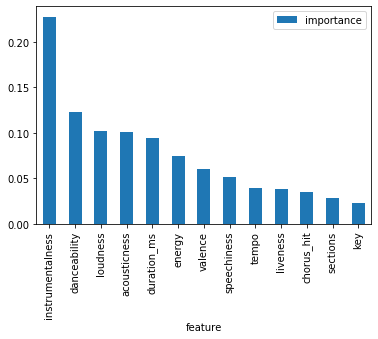

In [8]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [20, 50, 100, 200, 500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(x_train, y_train)
clf.bestparams

In [ ]:
clf.best_params_

In [ ]:
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 2,  n_estimators = 500)
rf.fit(x_train, y_train)
pred_optimal = rf.predict(x_test)

#random_forest.score(X_train, Y_train)
#print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [ ]:
count = 0
for i in range(len(pred_optimal)):
    if (pred_optimal[i] == true_values[i]):
        count = count + 1
print(count/len(true_values))

In [ ]:
pred70s = rf.predict(x70s_test)
true_values = y70s_test.values
count = 0
for i in range(len(pred70s)):
    if (pred70s[i] == true_values[i]):
        count = count + 1
print(count/len(true_values))

NameError: name 'np' is not defined